In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import math
import random

Fonte: https://medium.com/analytics-vidhya/implementing-particle-swarm-optimization-pso-algorithm-in-python-9efc2eb179a6

A implementação feita é bem diferente dessa que o cara fez. Ele usou classes com peso.

Essa tá bem manual (dicionários e varias funções).

Pseudocódigo do PSO:

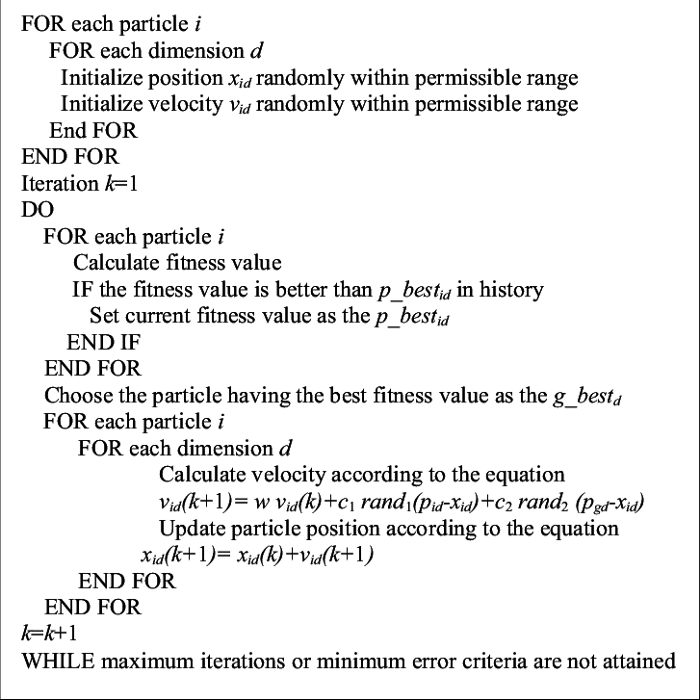

# Rastrigin pra 1 particula (fitness)

In [ ]:
def rastrigin(part):
    part_x = 10+part[0]**2 - 10*math.cos(2*math.pi*part[0])
    part_y = 10+part[1]**2 - 10*math.cos(2*math.pi*part[1])
    part_z = 10+part[2]**2 - 10*math.cos(2*math.pi*part[2])
    result = part_x + part_y + part_z
    return result

In [ ]:
rastrigin([5,5,-5])

75.0

# Inicialização de todas as particulas  (primeiro laço For)
 
 Posição de -5.12 até 5.12, velocidades 0

In [ ]:
def inicia_particulas(qnt_part,seed):
  random.seed(seed)
  enxame = {}
  
  enxamePos = []
  enxameVel = []
  enxameBestVal = []
  enxameBestPos = []
  for i in range(qnt_part):
    partPos = []
    partVel = []
    for j in range(3):
      rand1 = random.uniform(-5.12,5.12)
      partPos.append(rand1)
      #rand = random.uniform(-1,1)
      rand2 = 0
      partVel.append(rand2)
    inicBL = rastrigin(partPos)
    enxameBestPos.append(partPos)
    enxameBestVal.append(inicBL)  
    enxamePos.append(partPos)
    enxameVel.append(partVel)
  enxame['Pos'] = enxamePos
  enxame['Vel'] = enxameVel
  enxame['Loc'] = enxameBestVal
  enxame['PosLoc'] = enxameBestPos

  return enxame

In [ ]:
enx = inicia_particulas(10,2)
print(enx)

{'Pos': [[4.560342718892494, 4.478274870593493, -4.434486322731913], [-4.151280048410784, 3.3549887812944963, 2.359699890685233], [1.6973040144022091, -1.9186354241085581, 1.0594416567846245], [1.0680173364083787, 0.8120401711200307, -3.4161712974519443], [-0.6933035970873132, -1.0646817979462861, 2.2301208123746585], [4.948195629497427, 4.493954730932435, 0.44177047429320826], [-0.5514581127414644, -2.317592583506719, -4.640756706071424], [-4.72555142909181, -0.35106137902687884, -1.8153487214632258], [-1.1998507809928838, 3.9178945782828745, 0.2575276914602833], [0.6051036102649885, -2.638765928849379, -4.761419208592178]], 'Vel': [[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0]], 'Loc': [118.87781633717267, 70.73287668449127, 22.903179096170042, 39.21421219993536, 29.64385851886567, 84.73143623188811, 77.15179823545924, 59.2197813326535, 35.53100550805513, 73.61482518733582], 'PosLoc': [[4.560342718892494, 4.47827487059349

# Encontrar melhor partícula local (segundo laço for)

In [ ]:
def best_particula_local(enxame,qnt_part):
  for i in range(qnt_part):
    result = rastrigin(enxame['Pos'][i])
    if result <= enxame['Loc'][i]:
      enxame['Loc'][i] = result
      enxame['PosLoc'][i] = enxame['Pos'][i]

In [ ]:
best_particula_local(enx,10)
print(enx['Loc'])
enx['Pos'][1] = [0.1,0.1,0.1]
best_particula_local(enx,10)
print(enx['Loc'])
print(enx['PosLoc'])

[118.87781633717267, 70.73287668449127, 22.903179096170042, 39.21421219993536, 29.64385851886567, 84.73143623188811, 77.15179823545924, 59.2197813326535, 35.53100550805513, 73.61482518733582]
[118.87781633717267, 5.759490168751576, 22.903179096170042, 39.21421219993536, 29.64385851886567, 84.73143623188811, 77.15179823545924, 59.2197813326535, 35.53100550805513, 73.61482518733582]
[[4.560342718892494, 4.478274870593493, -4.434486322731913], [0.1, 0.1, 0.1], [1.6973040144022091, -1.9186354241085581, 1.0594416567846245], [1.0680173364083787, 0.8120401711200307, -3.4161712974519443], [-0.6933035970873132, -1.0646817979462861, 2.2301208123746585], [4.948195629497427, 4.493954730932435, 0.44177047429320826], [-0.5514581127414644, -2.317592583506719, -4.640756706071424], [-4.72555142909181, -0.35106137902687884, -1.8153487214632258], [-1.1998507809928838, 3.9178945782828745, 0.2575276914602833], [0.6051036102649885, -2.638765928849379, -4.761419208592178]]


# Encontrar Melhor particula global 

In [ ]:
def best_global(enxame,qnt_part,best_g_value,best_g_pos):
  for i in range(qnt_part):
    best_l_value = enxame['Loc'][i]
    best_l_pos = enxame['PosLoc'][i]
    if best_l_value < best_g_value:
      best_g_value = best_l_value
      best_g_pos[0] = best_l_pos[0]
      best_g_pos[1] = best_l_pos[1]
      best_g_pos[2] = best_l_pos[2]
  return best_g_value,best_g_pos

In [ ]:
bg = 10000
pos = [1,1,1]
bg,pos = best_global(enx,10,bg,pos)
print(bg,pos)

5.759490168751576 [0.1, 0.1, 0.1]


# Calcular a nova velocidade e posição (terceiro laço For)

In [ ]:
def calc_vel_pos(enxame,qnt_part,w_inertia,c1_personal_best,c2_social_best,pos_best_global,lim_vel,lim_pos):

  for i in range(qnt_part):
    for j in range(3):
      v_ant = enxame['Vel'][i][j]
      p_local = enxame['PosLoc'][i][j]
      posicao = enxame['Pos'][i][j]
      p_global = pos_best_global[j]
      #atualiza velocidade em dimensao j
      #r1 = random.uniform(0,1)
      #r2 = random.uniform(0,1)
      r1 = 1
      r2 = 1
      vid = w_inertia*v_ant + c1_personal_best*r1*(p_local-posicao) + c2_social_best*r2*(p_global-posicao)

      if vid > lim_vel:
        vid = lim_vel
      elif vid < -lim_vel:
        vid = -lim_vel

      #atualiza posicao em dimensao j
      pid = posicao + vid   

      if pid > lim_pos:
        pid = lim_pos
      elif pid < -lim_pos:
        pid = -lim_pos

      enxame['Vel'][i][j] = vid
      enxame['Pos'][i][j] = pid

# Plot aproveitado do algoritmo de GA

Foi retirado o plot da média por iteração pq ela não mostra nada para PSO

In [ ]:
def plot_resultados(resultados):
    
    # Resultado Geral
    plt.plot(resultados, 'blue')
        
    plt.title('Resultado Geral')
    plt.xlabel('Geração')
    plt.ylabel('f(x)')
    plt.legend(['Melhor Performance da Geração'])
    plt.rcParams['figure.figsize'] = (20,10)

    plt.figure()

# PSO 

Junta todas as funções geradas

In [ ]:
def PSO(qnt_part,n_inter,w_inertia,c1_personal_best,c2_social_best,lim_vel,lim_pos,seed):
  #inicia enxame
  enxame = inicia_particulas(qnt_part,seed)
  bg = 10000000
  pos_bg = [-20,-20,-20]
  #itera a atualizacao das particulas
  resultados = []
  for i in range(n_iter):
    #melhor local
    best_particula_local(enxame,qnt_part)

    #melhor global
    bg,pos_bg = best_global(enxame,qnt_part,bg,pos_bg)

    #novas posicoes e velocidades
    calc_vel_pos(enxame,qnt_part,w_inertia,c1_personal_best,c2_social_best,pos_bg,lim_vel,lim_pos)
    

    #pegar melhor resultado da iteração   
    resultados.append(bg)
    
    if i == (n_iter - 1):
      print('O valor mínimo obtido foi', bg)
      print('Os valores numéricos de entrada que trouxeram esse resultado foram', pos_bg)
  
  plot_resultados(resultados)
  return bg,pos_bg

O valor mínimo obtido foi 0.036865154764470276
Os valores numéricos de entrada que trouxeram esse resultado foram [-0.01139117186597581, 0.005434047572506373, -0.005156770838464712]
CPU times: user 617 ms, sys: 1.19 ms, total: 618 ms
Wall time: 623 ms


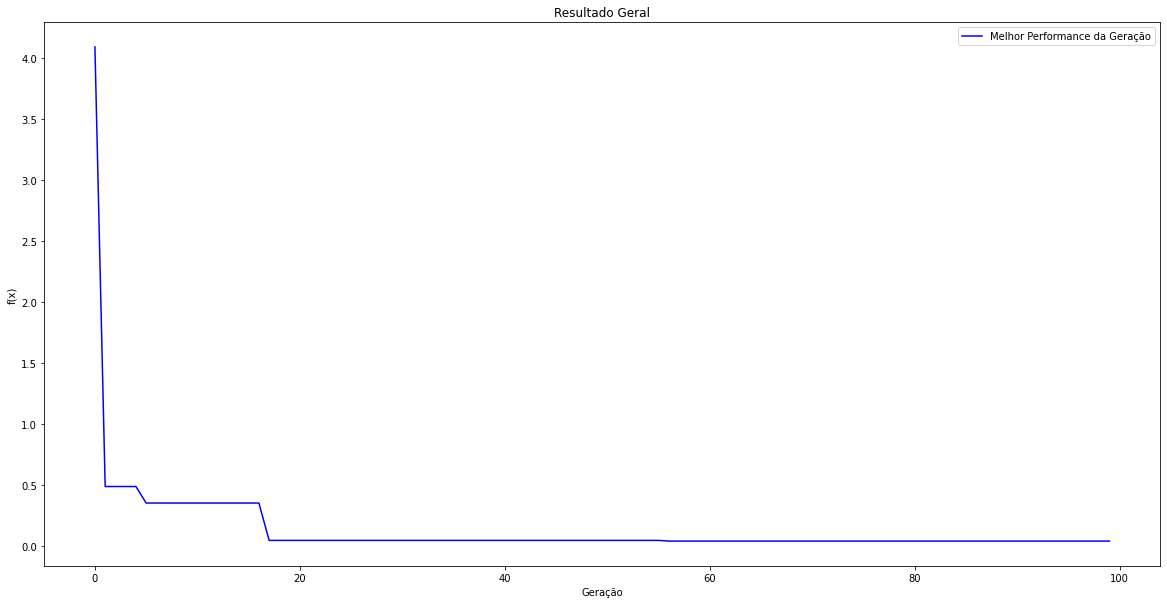

<Figure size 1440x720 with 0 Axes>

In [ ]:
%%time

qnt_part = 1000
n_iter = 100
w_inertia =1      #existe, mas n mexeremos
c1_personal_best = 0.5
c2_social_best = 0.9
lim_velocidade = 3  #saturação
lim_pos = 5.12    #limitar posição, para seguir a exigencia da função rastrigin
seed = 42

minimumPSO,pointMin = PSO(qnt_part,n_iter,w_inertia,c1_personal_best,c2_social_best,lim_velocidade,lim_pos,seed)
